In [48]:
#!pip install texttable
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from texttable import Texttable

def isNaN(num):
    return num != num

In [40]:
# read values from excel database
xlsx_path = 'tweets_database.xlsx'
data = pd.read_excel(xlsx_path, 
                  names=['HASHTAG', 'OTHER HASHTAGS', "Twitter ID", "tweet message", "retweet","location", "followers"])
#data

Project section 4

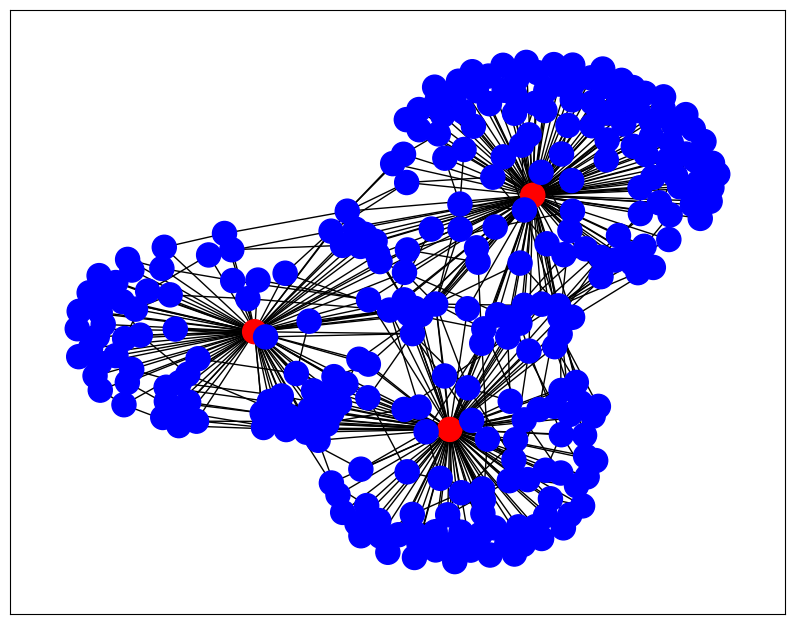

In [38]:
G = nx.Graph()
hashtag = data['HASHTAG'].tolist()
other_hashtags = data['OTHER HASHTAGS'].tolist()

for i in range(len(hashtag)):
    tag = hashtag[i]
    if(tag not in  list(G.nodes())):
        G.add_node(tag, color= "red")
    other_tags = other_hashtags[i]
    if(isNaN(other_tags)):
        continue
    other_tags = other_tags.split(",")
    last_tag = other_tags[0]
    for other_tag in other_tags:
        if(other_tag not in list(G.nodes())):
            if(other_tag in hashtag):
                G.add_node(other_tag, color= "red")
            else:
                G.add_node(other_tag, color= "blue")
        if(tag != other_tag):
            G.add_edge(tag,other_tag)
        if(last_tag != other_tag ):
            G.add_edge(last_tag,other_tag)
        last_tag = other_tag
colors = [u[1] for u in G.nodes(data="color")]
figure(figsize=(10, 8), dpi=100)
nx.draw_networkx(G,
                 with_labels =False,
                node_color=colors)
plt.show()



Project section 5

In [67]:
N,K= G.order(), G.size()
avg_deg = float(K)/N
cent = np.array([x for x in nx.degree_centrality(G).values()])
avg_deg_cent = sum(cent)/len(cent)
adc_variance = sum((cent -avg_deg_cent)**2)/len(cent)
diameter = nx.diameter(G) 
clustering = nx.clustering(G)
largest = max([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])


#print( "Nodes: ", N)
#print( "Edges: ", K )
#print( "Average degree: ", round(avg_deg,4)) 
#print("Avarage  degree centrality: ", round(avg_deg_cent,4))
#print("Avarage degree centrality variance: " ,round(adc_variance,4))
#print("Graph diameter: ", diameter)
#print("The clustering coefficient for nodes: ", clustering)
#print("The size of largest component: ", largest)
theTable = Texttable()
dictlist = [["Hashtag", "Coefficient"]]
for key, value in clustering.items():
    temp = [key,value]
    dictlist.append(temp)
theTable.add_rows(dictlist)

rows = [["Properties", "Value"],["Nodes",N], ["Edges",K], ["Average degree",round(avg_deg,4)],["Avarage  degree centrality",round(avg_deg_cent,4)],
       ["Avarage degree centrality variance",round(adc_variance,4)], ["Graph diameter",diameter],["The size of largest component",largest]]
table = Texttable()
table.add_rows(rows)
print(table.draw())
print(theTable.draw())

df1 = pd.DataFrame(rows)
df1.to_excel("Properties.xlsx") 
df2 = pd.DataFrame(dictlist)
df2.to_excel("clustering_coefficient.xlsx")

+------------------------------------+-------+
|             Properties             | Value |
+====================================+=======+
| Nodes                              | 287   |
+------------------------------------+-------+
| Edges                              | 600   |
+------------------------------------+-------+
| Average degree                     | 2.091 |
+------------------------------------+-------+
| Avarage  degree centrality         | 0.015 |
+------------------------------------+-------+
| Avarage degree centrality variance | 0.002 |
+------------------------------------+-------+
| Graph diameter                     | 3     |
+------------------------------------+-------+
| The size of largest component      | 287   |
+------------------------------------+-------+
+----------------------------+-------------+
|          Hashtag           | Coefficient |
+============================+=============+
| #stopsmoking               | 0.027       |
+--------------------